In [1]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import random

In [2]:
freedom_csv_path = "data/indexfreedom.csv"

In [3]:
freedom_df = pd.read_csv(freedom_csv_path, encoding="utf-8")
freedom_df

,year,ISO_code,countries,region,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,...,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,hf_score,hf_rank,hf_quartile
0,2016,ALB,Albania,Eastern Europe,6.661503,4.547244,4.666508,5.291752,8.920429,10.0,...,4.050196,7.324582,7.074366,6.705863,6.906901,7.54,34.0,7.568140,48.0,2.0
1,2016,DZA,Algeria,Middle East & North Africa,NaN,NaN,NaN,3.819566,9.456254,10.0,...,3.765515,8.523503,7.029528,5.676956,5.268992,4.99,159.0,5.135886,155.0,4.0
2,2016,AGO,Angola,Sub-Saharan Africa,NaN,NaN,NaN,3.451814,8.060260,5.0,...,1.945540,8.096776,6.782923,4.930271,5.518500,5.17,155.0,5.640662,142.0,4.0
3,2016,ARG,Argentina,Latin America & the Caribbean,7.098483,5.791960,4.343930,5.744791,7.622974,10.0,...,3.260044,5.253411,6.508295,5.535831,5.369019,4.84,160.0,6.469848,107.0,3.0
4,2016,ARM,Armenia,Caucasus & Central Asia,NaN,NaN,NaN,5.003205,8.808750,10.0,...,4.575152,9.319612,6.491481,6.797530,7.378069,7.57,29.0,7.241402,57.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,2008,VEN,Venezuela,Latin America & the Caribbean,3.000000,3.781688,2.369239,3.100000,0.000000,10.0,...,2.784695,4.578318,0.315142,2.864160,4.666936,4.22,140.0,5.257879,136.0,4.0
1454,2008,VNM,Vietnam,South Asia,6.666667,4.349101,5.694847,5.600000,9.496239,5.0,...,3.626593,7.306074,0.000000,4.574683,6.307577,6.19,103.0,6.420206,106.0,3.0
1455,2008,YEM,"Yemen, Rep.",Middle East & North Africa,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1456,2008,ZMB,Zambia,Sub-Saharan Africa,4.800000,4.578003,3.688652,4.400000,7.878084,10.0,...,4.585391,5.124436,8.520369,6.681524,6.722175,7.15,57.0,6.647724,95.0,3.0


In [4]:
freedom_country_df = freedom_df.copy()
freedom_country_df.set_index(['countries'], inplace=True)
freedom_country_df.head()

,year,ISO_code,region,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,pf_ss_disappearances_violent,...,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,hf_score,hf_rank,hf_quartile
countries,,,,,,,,,,,,,,,,,,,,,
Albania,2016,ALB,Eastern Europe,6.661503,4.547244,4.666508,5.291752,8.920429,10.0,10.00000,...,4.050196,7.324582,7.074366,6.705863,6.906901,7.54,34.0,7.568140,48.0,2.0
Algeria,2016,DZA,Middle East & North Africa,NaN,NaN,NaN,3.819566,9.456254,10.0,9.29403,...,3.765515,8.523503,7.029528,5.676956,5.268992,4.99,159.0,5.135886,155.0,4.0
Angola,2016,AGO,Sub-Saharan Africa,NaN,NaN,NaN,3.451814,8.060260,5.0,10.00000,...,1.945540,8.096776,6.782923,4.930271,5.518500,5.17,155.0,5.640662,142.0,4.0
Argentina,2016,ARG,Latin America & the Caribbean,7.098483,5.791960,4.343930,5.744791,7.622974,10.0,10.00000,...,3.260044,5.253411,6.508295,5.535831,5.369019,4.84,160.0,6.469848,107.0,3.0
Armenia,2016,ARM,Caucasus & Central Asia,NaN,NaN,NaN,5.003205,8.808750,10.0,10.00000,...,4.575152,9.319612,6.491481,6.797530,7.378069,7.57,29.0,7.241402,57.0,2.0


In [5]:
descr_cols = ['year', 'ISO_code']

score_columns = ['hf_score', "pf_score", "ef_score", 
                 'ef_money_growth', 
                 'pf_expression_internet',
                 'ef_regulation_business_bribes']

In [6]:
freedom_scores_df = freedom_country_df[descr_cols + score_columns].dropna()

In [7]:
freedom_scores_df

,year,ISO_code,hf_score,pf_score,ef_score,ef_money_growth,pf_expression_internet,ef_regulation_business_bribes
countries,,,,,,,,
Albania,2016,ALB,7.568140,7.596281,7.54,8.986454,10.000000,4.050196
Algeria,2016,DZA,5.135886,5.281772,4.99,6.955962,7.500000,3.765515
Angola,2016,AGO,5.640662,6.111324,5.17,9.385679,7.500000,1.945540
Argentina,2016,ARG,6.469848,8.099696,4.84,5.233264,10.000000,3.260044
Armenia,2016,ARM,7.241402,6.912804,7.57,9.078264,7.500000,4.575152
...,...,...,...,...,...,...,...,...
Uruguay,2008,URY,7.947847,8.775693,7.12,6.715070,10.000000,7.112031
Venezuela,2008,VEN,5.257879,6.295759,4.22,6.056618,6.666667,2.784695
Vietnam,2008,VNM,6.420206,6.650413,6.19,8.095573,3.333333,3.626593


In [8]:
#establish the quartiles using the qcut function
freedom_scores_df['Quartile_hf'] = \
    pd.qcut(x=freedom_scores_df['hf_score'], q=4, labels=['4th', '3rd', '2nd', '1st'])

freedom_scores_df['Quartile_pf'] = \
    pd.qcut(x=freedom_scores_df['pf_score'], q=4, labels=['4th', '3rd', '2nd', '1st'])

freedom_scores_df['Quartile_ef'] = \
    pd.qcut(x=freedom_scores_df['ef_score'], q=4, labels=['4th', '3rd', '2nd', '1st'])

freedom_scores_df['Quartile_ef_money_growth'] = \
    pd.qcut(x=freedom_scores_df['ef_money_growth'], q=4, labels=['4th', '3rd', '2nd', '1st'])

freedom_scores_df['Quartile_corrupt'] = \
    pd.qcut(x=freedom_scores_df['ef_regulation_business_bribes'], q=4, labels=['4th', '3rd', '2nd', '1st'])

freedom_scores_df

,year,ISO_code,hf_score,pf_score,ef_score,ef_money_growth,pf_expression_internet,ef_regulation_business_bribes,Quartile_hf,Quartile_pf,Quartile_ef,Quartile_ef_money_growth,Quartile_corrupt
countries,,,,,,,,,,,,,
Albania,2016,ALB,7.568140,7.596281,7.54,8.986454,10.000000,4.050196,2nd,2nd,1st,2nd,3rd
Algeria,2016,DZA,5.135886,5.281772,4.99,6.955962,7.500000,3.765515,4th,4th,4th,4th,3rd
Angola,2016,AGO,5.640662,6.111324,5.17,9.385679,7.500000,1.945540,4th,4th,4th,1st,4th
Argentina,2016,ARG,6.469848,8.099696,4.84,5.233264,10.000000,3.260044,3rd,2nd,4th,4th,4th
Armenia,2016,ARM,7.241402,6.912804,7.57,9.078264,7.500000,4.575152,2nd,3rd,1st,2nd,2nd
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uruguay,2008,URY,7.947847,8.775693,7.12,6.715070,10.000000,7.112031,2nd,1st,2nd,4th,1st
Venezuela,2008,VEN,5.257879,6.295759,4.22,6.056618,6.666667,2.784695,4th,3rd,4th,4th,4th
Vietnam,2008,VNM,6.420206,6.650413,6.19,8.095573,3.333333,3.626593,4th,3rd,4th,4th,3rd


In [9]:
#confirm that we've divided the data into four groups of roughly equal size
qt_columns = ['Quartile_hf',
               'Quartile_pf',
               'Quartile_ef', 
               'Quartile_ef_money_growth', 
               'Quartile_corrupt'
              ]
[print(f"Bin Counts ({bin}):\n{freedom_scores_df[bin].value_counts()}\n") for bin in qt_columns]

Bin Counts (Quartile_hf):
1st    270
3rd    270
4th    270
2nd    269
Name: Quartile_hf, dtype: int64

Bin Counts (Quartile_pf):
1st    270
3rd    270
4th    270
2nd    269
Name: Quartile_pf, dtype: int64

Bin Counts (Quartile_ef):
4th    274
2nd    272
3rd    267
1st    266
Name: Quartile_ef, dtype: int64

Bin Counts (Quartile_ef_money_growth):
1st    270
3rd    270
4th    270
2nd    269
Name: Quartile_ef_money_growth, dtype: int64

Bin Counts (Quartile_corrupt):
1st    270
3rd    270
4th    270
2nd    269
Name: Quartile_corrupt, dtype: int64



[None, None, None, None, None]

In [17]:
#group by quartile
qt_groups = freedom_scores_df.groupby(['Quartile_corrupt'])
qt_groups.head()

,year,ISO_code,hf_score,pf_score,ef_score,ef_money_growth,pf_expression_internet,ef_regulation_business_bribes,Quartile_hf,Quartile_pf,Quartile_ef,Quartile_ef_money_growth,Quartile_corrupt
countries,,,,,,,,,,,,,
Albania,2016,ALB,7.568140,7.596281,7.54,8.986454,10.0,4.050196,2nd,2nd,1st,2nd,3rd
Algeria,2016,DZA,5.135886,5.281772,4.99,6.955962,7.5,3.765515,4th,4th,4th,4th,3rd
Angola,2016,AGO,5.640662,6.111324,5.17,9.385679,7.5,1.945540,4th,4th,4th,1st,4th
Argentina,2016,ARG,6.469848,8.099696,4.84,5.233264,10.0,3.260044,3rd,2nd,4th,4th,4th
Armenia,2016,ARM,7.241402,6.912804,7.57,9.078264,7.5,4.575152,2nd,3rd,1st,2nd,2nd
Australia,2016,AUS,8.582219,9.184438,7.98,8.564838,10.0,7.238900,1st,1st,1st,3rd,1st
Austria,2016,AUT,8.413474,9.246948,7.58,8.033869,10.0,6.418890,1st,1st,1st,4th,2nd
Azerbaijan,2016,AZE,6.083277,5.676553,6.49,9.240398,7.5,5.353533,4th,4th,3rd,2nd,2nd
Bahrain,2016,BHR,6.848035,6.136070,7.56,9.961596,2.5,6.596745,3rd,4th,1st,1st,1st


In [25]:
#descriptive data for personal freedom within each quartile
qt_groups['pf_score'].describe()

,count,mean,std,min,25%,50%,75%,max
Quartile_corrupt,,,,,,,,
4th,270.0,6.509120,0.976440,3.880566,5.767172,6.535664,7.291123,8.714023
3rd,270.0,6.990453,1.059573,4.532449,6.295881,6.892127,7.713172,9.091980
2nd,269.0,7.436072,1.352438,3.852272,6.266073,7.718818,8.711692,9.380256
1st,270.0,8.339077,1.405971,4.361519,7.790939,9.025228,9.257344,9.568154


In [30]:
#create separate dataframes for data points in the highest and lowest quartiles
lowest_qt = freedom_scores_df.loc[freedom_scores_df["Quartile_corrupt"] == "4th"]
highest_qt = freedom_scores_df.loc[freedom_scores_df["Quartile_corrupt"] == "1st"]
lowest_qt

,year,ISO_code,hf_score,pf_score,ef_score,ef_money_growth,pf_expression_internet,ef_regulation_business_bribes,Quartile_hf,Quartile_pf,Quartile_ef,Quartile_ef_money_growth,Quartile_corrupt
countries,,,,,,,,,,,,,
Angola,2016,AGO,5.640662,6.111324,5.17,9.385679,7.500000,1.945540,4th,4th,4th,1st,4th
Argentina,2016,ARG,6.469848,8.099696,4.84,5.233264,10.000000,3.260044,3rd,2nd,4th,4th,4th
Bangladesh,2016,BGD,5.801300,5.302600,6.30,9.489123,7.500000,2.488781,4th,4th,4th,1st,4th
Benin,2016,BEN,6.738488,7.496976,5.98,9.438973,10.000000,2.790034,3rd,2nd,4th,1st,4th
Bolivia,2016,BOL,6.718385,7.206770,6.23,9.969644,10.000000,2.103305,3rd,3rd,4th,1st,4th
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Nepal,2008,NPL,6.713673,7.397345,6.03,8.135833,10.000000,3.016840,3rd,2nd,4th,4th,4th
Paraguay,2008,PRY,6.900825,7.301651,6.50,7.344674,6.666667,2.880026,3rd,2nd,3rd,4th,4th
Philippines,2008,PHL,7.055629,7.391257,6.72,8.685089,10.000000,2.992922,2nd,2nd,3rd,3rd,4th


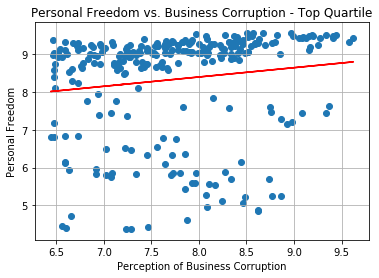

In [47]:
#create scatterplot of top quartile of corruption vs. personal freedom
corrupt_hi = highest_qt["ef_regulation_business_bribes"].values
pf_score_hi = highest_qt["pf_score"].values

fig, ax = plt.subplots()
ax.scatter(corrupt_hi, pf_score_hi);
plt.title("Personal Freedom vs. Business Corruption - Top Quartile")
plt.xlabel("Perception of Business Corruption")
plt.ylabel("Personal Freedom")
mask = ~np.isnan(corrupt_hi) & ~np.isnan(pf_score_hi)
slope, intercept, r_value, p_value, std_err = stats.linregress(corrupt_hi[mask], pf_score_hi[mask])
regression_line = slope * corrupt_hi + intercept
plt.plot(corrupt_hi, regression_line, 'r')
plt.grid()
plt.savefig("top_quartile.png")

In [42]:
#calculate r^2 to determine proportion of variance in personal freedom explained by corruption
#and find the p-value to determine whether this finding is statistically significant
print(f"r^2: {r_value*r_value}")
print(f"p-value: {p_value}")

r^2: 0.01903700796537157
p-value: 0.023360184971231268


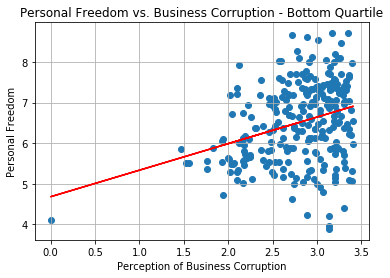

In [48]:
#repeat for lowest quartile
corrupt_lo = lowest_qt["ef_regulation_business_bribes"].values
pf_score_lo = lowest_qt["pf_score"].values

fig, ax = plt.subplots()
ax.scatter(corrupt_lo, pf_score_lo)
plt.title("Personal Freedom vs. Business Corruption - Bottom Quartile")
plt.xlabel("Perception of Business Corruption")
plt.ylabel("Personal Freedom")
mask = ~np.isnan(corrupt_lo) & ~np.isnan(pf_score_lo)
slope, intercept, r_value, p_value, std_err = stats.linregress(corrupt_lo[mask], pf_score_lo[mask])
regression_line = slope * corrupt_lo + intercept
plt.plot(corrupt_lo, regression_line, 'r')
plt.grid()
plt.savefig("bottom_quartile.png")

In [45]:
print(f"r^2: {r_value*r_value}")
print(f"p-value: {p_value}")

r^2: 0.09445593773920517
p-value: 2.579196796706297e-07
